Họ Và Tên : Bùi Thị Thanh Phương
MSSV: 20110280

#5. Đây là dữ liệu được quan sát giữa các thông tin của những người bị bệnh tiểu đường.
a) Hãy sử dụng t-distributed stochastic neighbor embedding (t-SNE) để giảm chiều dữ liệu trên.

b) Hãy sử dụng Uniform Manifold Approximation and Projection (UMAP) để giảm chiều dữ liệu trên.

c) Hãy đưa ra kết luận và nhận xét khi thực thi hai kỹ thuật giảm chiều dữ liệu trên.

In [1]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=8201e38bf2c4a2875bf8357ac1b77b49f1728b12853d1294380a4c3a2d3760a5
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=cdaa996f4783475b222deb106a0ee9a92f1458b32b1193a41bc64ad920a313cb
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap

In [3]:
X = pd.read_csv("/content/Diabetes.csv")

In [4]:
X.head

<bound method NDFrame.head of      pregnant  glucose  diastolic  triceps  insulin   bmi  family  age  \
0           1       89         66       23       94  28.1   0.167   21   
1           0      137         40       35      168  43.1   2.288   33   
2           3       78         50       32       88  31.0   0.248   26   
3           2      197         70       45      543  30.5   0.158   53   
4           1      189         60       23      846  30.1   0.398   59   
..        ...      ...        ...      ...      ...   ...     ...  ...   
387         0      181         88       44      510  43.3   0.222   26   
388         1      128         88       39      110  36.5   1.057   37   
389         2       88         58       26       16  28.4   0.766   22   
390        10      101         76       48      180  32.9   0.171   63   
391         5      121         72       23      112  26.2   0.245   30   

         test  
0    negative  
1    positive  
2    positive  
3    positive  
4

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   392 non-null    int64  
 1   glucose    392 non-null    int64  
 2   diastolic  392 non-null    int64  
 3   triceps    392 non-null    int64  
 4   insulin    392 non-null    int64  
 5   bmi        392 non-null    float64
 6   family     392 non-null    float64
 7   age        392 non-null    int64  
 8   test       392 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 27.7+ KB


In [6]:
#Xóa cột
new = X.drop(columns=['test'])
new

,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age
0,1,89,66,23,94,28.1,0.167,21
1,0,137,40,35,168,43.1,2.288,33
2,3,78,50,32,88,31.0,0.248,26
3,2,197,70,45,543,30.5,0.158,53
4,1,189,60,23,846,30.1,0.398,59
...,...,...,...,...,...,...,...,...
387,0,181,88,44,510,43.3,0.222,26
388,1,128,88,39,110,36.5,1.057,37
389,2,88,58,26,16,28.4,0.766,22
390,10,101,76,48,180,32.9,0.171,63


In [7]:
#Thay đổi kiểu dữ liệu
new['bmi'] = new['bmi'].astype('int')
print(new['bmi'].dtype)

new['family'] = new['family'].astype('int')
print(new['family'].dtype)

int64
int64


# a) Hãy sử dụng t-distributed stochastic neighbor embedding (t-SNE) để giảm chiều dữ liệu trên.

In [8]:
# Áp dụng phương pháp t-SNE để giảm chiều dữ liệu
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(new)

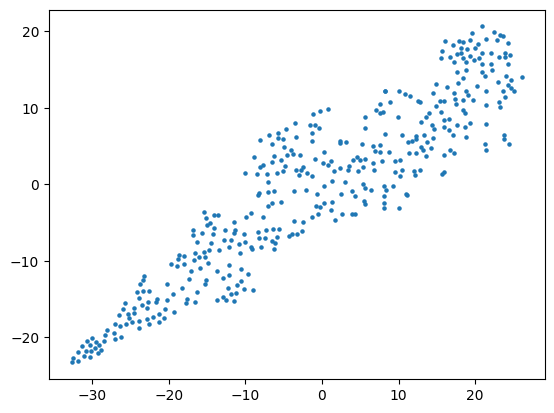

In [9]:
# Vẽ biểu đồ 2D của dữ liệu sau khi giảm chiều
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=5)
plt.show()

Hãy sử dụng Uniform Manifold Approximation and Projection (UMAP) để giảm chiều dữ liệu trên.

In [10]:
# Áp dụng phương pháp UMAP để giảm chiều dữ liệu
reducer = umap.UMAP(n_components=2)
X_umap = reducer.fit_transform(new)

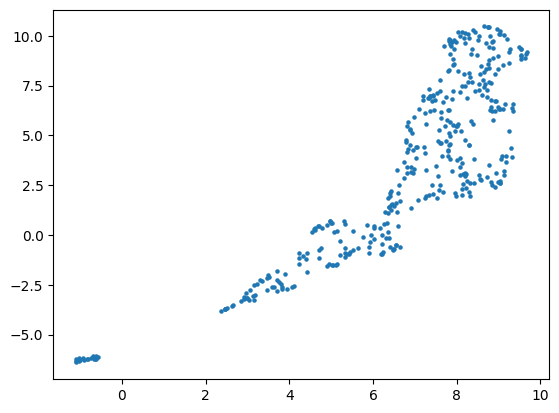

In [11]:
# Vẽ biểu đồ 2D của dữ liệu sau khi giảm chiều
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=5)
plt.show()

#c) Hãy đưa ra kết luận và nhận xét khi thực thi hai kỹ thuật giảm chiều dữ liệu trên.

- t-SNE và UMAP đều có thể giảm chiều dữ liệu phi tuyến và giữ lại cấu trúc của dữ liệu.
- UMAP có hiệu suất và độ chính xác tốt hơn so với t-SNE khi thực thi trên các dữ liệu lớn và phức tạp.
- t-SNE có khả năng giữ lại cấu trúc chi tiết của dữ liệu hơn UMAP, nhưng lại có vấn đề về tính ổn định khi thực thi trên các dữ liệu lớn.
- Cả hai kỹ thuật đều có thể được sử dụng để phân tích và khám phá cấu trúc của dữ liệu, tuy nhiên, việc lựa chọn kỹ thuật phù hợp phụ thuộc vào đặc điểm của dữ liệu và mục đích sử dụng của người dùng.